# Tesla Stock Price Prediction with Prophet

## Importing and Initializing  Libraries

In [1]:
import pandas  as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import matplotlib.pyplot as plt
from prophet import Prophet

## Importing the Dataset

In [2]:
df = pd.read_csv('TESLA_stock.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-05,17.990667,18.406668,17.740667,18.330667,18.330667,195574500
1,2019-04-08,18.512667,18.743999,18.029333,18.213333,18.213333,156156000
2,2019-04-09,18.110001,18.333332,17.974001,18.153999,18.153999,88560000
3,2019-04-10,18.449333,18.558666,18.192667,18.403999,18.403999,105919500
4,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500
...,...,...,...,...,...,...,...
1252,2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000
1253,2024-03-28,177.449997,179.570007,175.300003,175.789993,175.789993,77654800
1254,2024-04-01,176.169998,176.750000,170.210007,175.220001,175.220001,81562100
1255,2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,179.944499,183.957362,175.602803,179.876167,179.876167,1.326445e+08
std,102.779090,104.950054,100.303286,102.619474,102.619474,8.457212e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,85.112663,91.852669,84.402664,91.058670,91.058670,8.039910e+07
50%,203.910004,208.440002,198.520004,203.373337,203.373337,1.085954e+08
75%,251.449997,256.586670,246.350006,251.919998,251.919998,1.546935e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Data Visualization for the Historical Performance of Tesla

In [6]:
px.area(df, x='Date', y='Close')

In [7]:
px.area(df, x='Date', y='Volume')

In [8]:
px.box(df,y='Close')

## Data Preparation

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-05,17.990667,18.406668,17.740667,18.330667,18.330667,195574500
1,2019-04-08,18.512667,18.743999,18.029333,18.213333,18.213333,156156000
2,2019-04-09,18.110001,18.333332,17.974001,18.153999,18.153999,88560000
3,2019-04-10,18.449333,18.558666,18.192667,18.403999,18.403999,105919500
4,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500
...,...,...,...,...,...,...,...
1252,2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000
1253,2024-03-28,177.449997,179.570007,175.300003,175.789993,175.789993,77654800
1254,2024-04-01,176.169998,176.750000,170.210007,175.220001,175.220001,81562100
1255,2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600


In [10]:
columns = ['Date','Close']
ndf = pd.DataFrame(df,columns=columns)

In [11]:
ndf

,Date,Close
0,2019-04-05,18.330667
1,2019-04-08,18.213333
2,2019-04-09,18.153999
3,2019-04-10,18.403999
4,2019-04-11,17.894667
...,...,...
1252,2024-03-27,179.830002
1253,2024-03-28,175.789993
1254,2024-04-01,175.220001
1255,2024-04-02,166.630005


In [12]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [13]:
prophet_df

,ds,y
0,2019-04-05,18.330667
1,2019-04-08,18.213333
2,2019-04-09,18.153999
3,2019-04-10,18.403999
4,2019-04-11,17.894667
...,...,...
1252,2024-03-27,179.830002
1253,2024-03-28,175.789993
1254,2024-04-01,175.220001
1255,2024-04-02,166.630005


## Using Facebook's Prophet Model

In [14]:
model = Prophet()
model.fit(prophet_df)

20:25:38 - cmdstanpy - INFO - Chain [1] start processing
20:25:38 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [18]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-05,15.681926,-24.618660,56.218329,15.681926,15.681926,-0.214336,-0.214336,-0.214336,-1.249188,-1.249188,-1.249188,1.034852,1.034852,1.034852,0.0,0.0,0.0,15.467591
1,2019-04-08,15.730722,-24.441448,57.690584,15.730722,15.730722,2.626292,2.626292,2.626292,0.440612,0.440612,0.440612,2.185680,2.185680,2.185680,0.0,0.0,0.0,18.357014
2,2019-04-09,15.746987,-21.273290,57.536299,15.746987,15.746987,1.818742,1.818742,1.818742,-0.576572,-0.576572,-0.576572,2.395315,2.395315,2.395315,0.0,0.0,0.0,17.565729
3,2019-04-10,15.763252,-19.637392,56.940630,15.763252,15.763252,2.261096,2.261096,2.261096,-0.263064,-0.263064,-0.263064,2.524160,2.524160,2.524160,0.0,0.0,0.0,18.024348
4,2019-04-11,15.779517,-24.537127,58.367091,15.779517,15.779517,1.701076,1.701076,1.701076,-0.874863,-0.874863,-0.874863,2.575939,2.575939,2.575939,0.0,0.0,0.0,17.480593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2024-04-29,227.949893,177.860885,260.480276,227.658033,228.105373,-8.627678,-8.627678,-8.627678,0.440612,0.440612,0.440612,-9.068290,-9.068290,-9.068290,0.0,0.0,0.0,219.322215
1283,2024-04-30,228.008492,178.513162,257.043256,227.673261,228.210282,-10.911389,-10.911389,-10.911389,-0.576572,-0.576572,-0.576572,-10.334816,-10.334816,-10.334816,0.0,0.0,0.0,217.097103
1284,2024-05-01,228.067091,175.148629,258.455853,227.672280,228.307546,-11.908365,-11.908365,-11.908365,-0.263064,-0.263064,-0.263064,-11.645301,-11.645301,-11.645301,0.0,0.0,0.0,216.158726
1285,2024-05-02,228.125690,174.118677,253.040916,227.706270,228.398860,-13.865408,-13.865408,-13.865408,-0.874863,-0.874863,-0.874863,-12.990545,-12.990545,-12.990545,0.0,0.0,0.0,214.260282


In [20]:
px.line(forecast,x='ds',y='yhat')

C:\Users\bhask\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\bhask\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



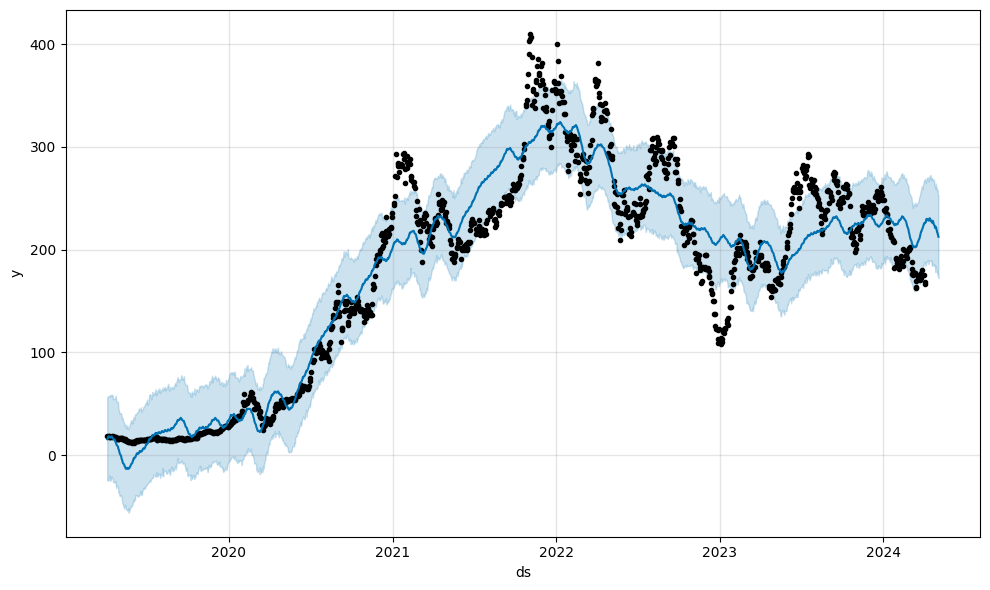

In [21]:
figure = model.plot(forecast,xlabel='ds',ylabel='y')

C:\Users\bhask\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\bhask\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\bhask\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



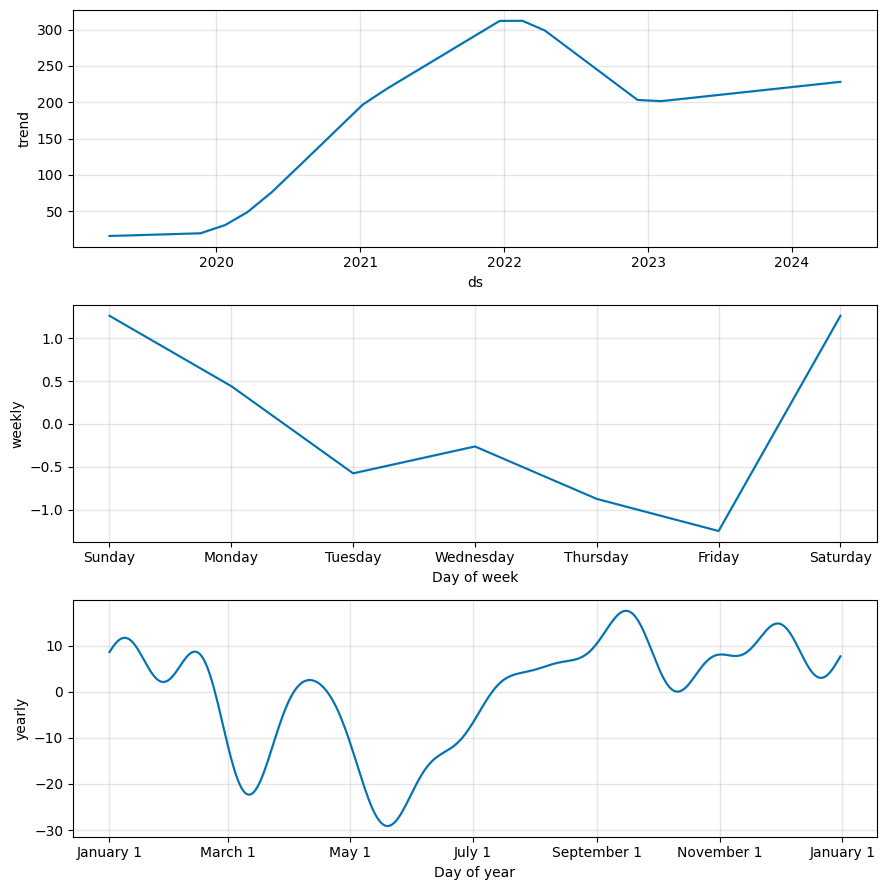

In [22]:
figure2 = model.plot_components(forecast)